In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("Life Expectancy Data.csv")

In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (2938, 22)
Columns: Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [5]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [6]:
print("Missing values per column:\n", df.isnull().sum())

Missing values per column:
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64


In [7]:
df.dropna(inplace=True)

In [16]:
le_country = LabelEncoder()
le_status = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"])
df["Status"] = le_status.fit_transform(df["Status"])


In [17]:
X = df.drop('Life expectancy', axis=1)
y = df['Life expectancy']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [20]:
y_pred = regressor.predict(X_test)

print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

R² Score: 0.881
RMSE: 2.913


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


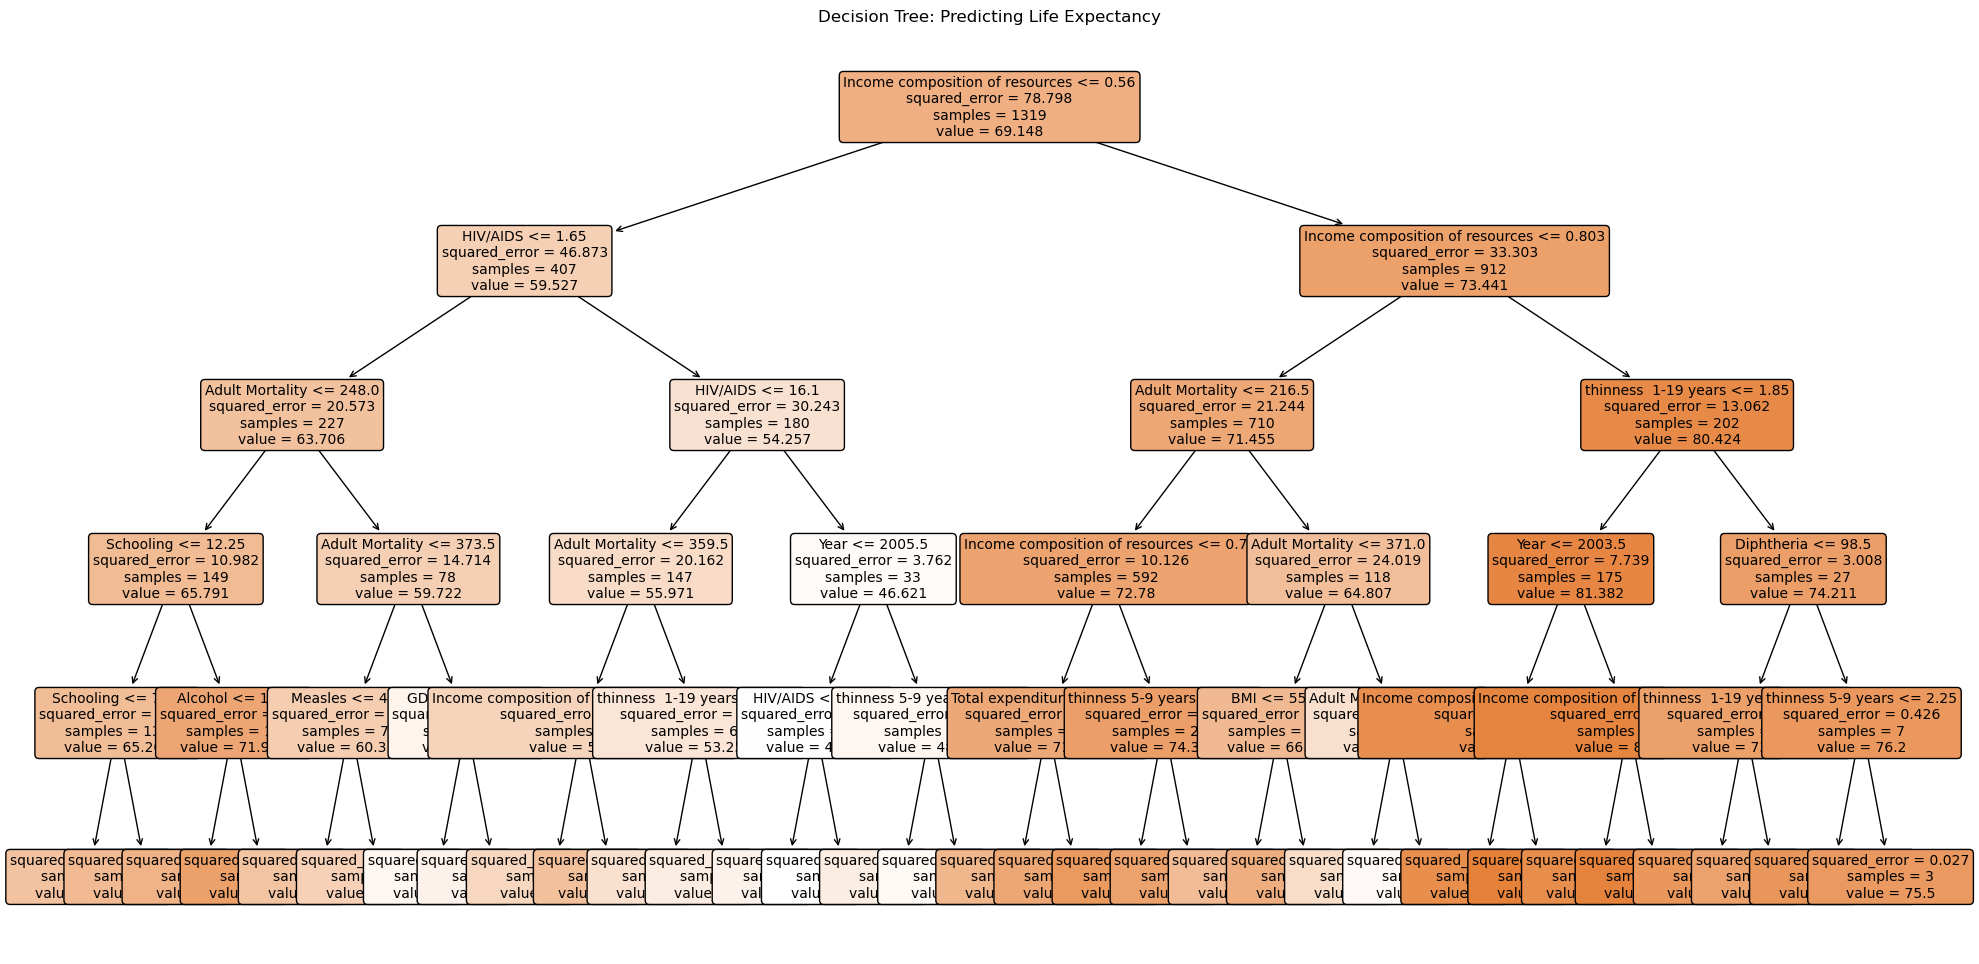

In [21]:
plt.figure(figsize=(24, 12))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree: Predicting Life Expectancy")
plt.show()

In [22]:
joblib.dump(regressor, "life_expectancy_model.pkl")
print("✅ Model saved as 'life_expectancy_model.pkl'")

✅ Model saved as 'life_expectancy_model.pkl'


In [23]:
import joblib
joblib.dump(le_country, "le_country.pkl")
joblib.dump(le_status, "le_status.pkl")

['le_status.pkl']